### Credits to Neumann et al. (2023) http://dx.doi.org/10.2139/ssrn.4173442

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pypsa
import seaborn as sns

In [9]:
EXPORT = 40
CO2L = 0.10
CLUSTERS = 10
H = 3
LL = "1.0"
DISCOUNT_RATE = 0.15

RUN = "nresults_full_3H_ws"
CATEGORY = "postnetworks"
SCENARIO = f"elec_s_{CLUSTERS}_ec_lc{LL}_Co2L{CO2L}0_{H}H_2030_{DISCOUNT_RATE}_DF_{EXPORT}export"

#OVERRIDES = PATH + "pypsa-eur-sec/data/override_component_attrs"

PREFIX = "/mnt/c/Users/scl38887/Documents/git/aldehyde/"
OUTPUT = PREFIX + "results"
INPUT = PREFIX + f"workflow/subworkflows/pypsa-earth-sec/results/{RUN}/{CATEGORY}/{SCENARIO}.nc"
OUTPUT_SCENARIO = f"{OUTPUT}/{RUN}/graphics/heatmaps/{SCENARIO}"
OUTPUT_RAW = f"{OUTPUT}/{RUN}/graphics/heatmaps/"

In [10]:
n = pypsa.Network(INPUT)

INFO:pypsa.io:Imported network elec_s_10_ec_lc1.0_Co2L0.30_3H_2030_0.15_DF_40export.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [12]:
# tech_colors = config["plotting"]["tech_colors"]
# tech_colors["load"] = "red"

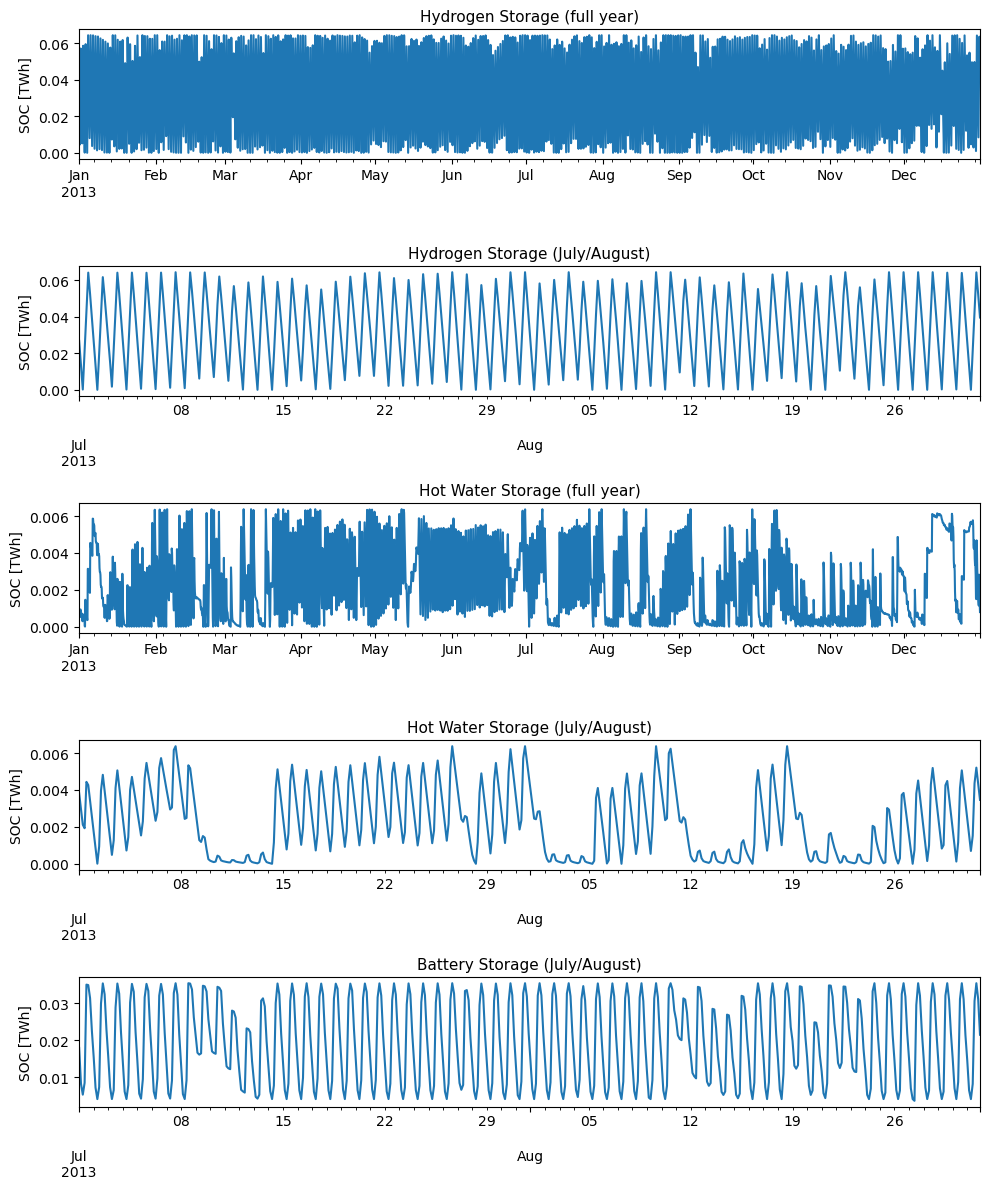

In [17]:
fig, axs = plt.subplots(5, 1, figsize=(10, 12))

ax = axs[0]
n.stores_t.e.filter(like="H2 Store", axis=1).sum(axis=1).div(1e6).plot(
    ax=ax,
    ylabel="SOC [TWh]",
    xlabel="",
    #color=tech_colors["hydrogen storage"],
    #ylim=(0, 65),
)
ax.set_title("Hydrogen Storage (full year)", fontsize=11)

ax = axs[2]
n.stores_t.e.filter(like="water tank", axis=1).sum(axis=1).div(1e6).plot(
    ax=ax,
    ylabel="SOC [TWh]",
    xlabel="",
    #color=tech_colors["hot water storage"],
    #ylim=(0, 65),
)
ax.set_title("Hot Water Storage (full year)", fontsize=11)

ax = axs[1]
n.stores_t.e.filter(like="H2 Store", axis=1).sum(axis=1).loc["2013-07":"2013-08"].div(
    1e6
).plot(ax=ax, ylabel="SOC [TWh]", xlabel="", #color=tech_colors["hydrogen storage"]
       )
ax.set_title("Hydrogen Storage (July/August)", fontsize=11)

ax = axs[3]
n.stores_t.e.filter(like="water tank", axis=1).sum(axis=1).loc["2013-07":"2013-08"].div(
    1e6
).plot(ax=ax, ylabel="SOC [TWh]", xlabel="", #color=tech_colors["hot water storage"]
       )
ax.set_title("Hot Water Storage (July/August)", fontsize=11)

ax = axs[4]
n.stores_t.e.filter(like="battery", axis=1).sum(axis=1).loc["2013-07":"2013-08"].div(
    1e6
).plot(ax=ax, ylabel="SOC [TWh]", xlabel="", #color=tech_colors["battery"],
        #ylim=(0, 8)
        )
ax.set_title("Battery Storage (July/August)", fontsize=11)

plt.tight_layout()

plt.savefig(f"{OUTPUT_SCENARIO}/soc.pdf", bbox_inches="tight")